# 모듈 설치

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

2.2.0


In [2]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 트레이닝 데이터 만들기

In [19]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3600   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3600 입니다.
x_train shape: (3600, 28, 28, 3)
y_train shape: (3600,)


라벨:  0


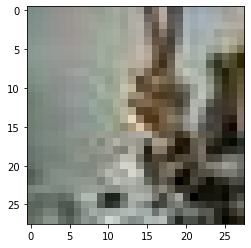

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[555])
print('라벨: ', y_train[555])

### 모델 추가

In [20]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [22]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

Before Reshape - x_train_norm shape: (3600, 28, 28, 3)
After Reshape - x_train_reshaped shape: (3600, 28, 28, 3)


### 학습 시키기

In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
113/113 [==============================] - 0s 2ms/step - loss: 1.0106 - accuracy: 0.4736
Epoch 2/10
113/113 [==============================] - 0s 2ms/step - loss: 0.7097 - accuracy: 0.7000
Epoch 3/10
113/113 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.8019
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8692
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2762 - accuracy: 0.9108
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9356
Epoch 7/10
113/113 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9450
Epoch 8/10
113/113 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9683
Epoch 9/10
113/113 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.9778
Epoch 10/10
113/113 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9842

### train data loss, accuracy확인

In [24]:
train_loss, train_accuracy = model.evaluate(x_train_reshaped,y_train, verbose=2)
print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

113/113 - 0s - loss: 0.0516 - accuracy: 0.9931
train_loss: 0.05164642632007599 
train_accuracy: 0.9930555820465088


### 테스트 데이터 만들기

In [25]:
def load_data_test(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/test_data"
(x_test, y_test)=load_data_test(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### test 데이터 shape

In [26]:
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

# 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 3)

print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_test_norm shape: (300, 28, 28, 3)
After Reshape - x_test_reshaped shape: (300, 28, 28, 3)


라벨:  2


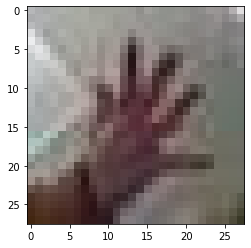

In [27]:
import matplotlib.pyplot as plt
plt.imshow(x_test[299])
print('라벨: ', y_test[299])

In [13]:
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

# model.fit(x_test_reshaped, y_test, epochs=10)

### 테스트

In [28]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 0.7682 - accuracy: 0.7367
test_loss: 0.7681938409805298 
test_accuracy: 0.7366666793823242


In [29]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0.23653972 0.7523148  0.01114547]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


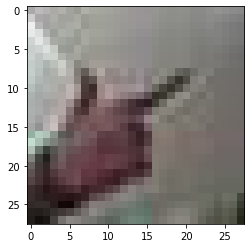

In [30]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0.2604473  0.00565908 0.73389363]
라벨: 0, 예측결과: 2


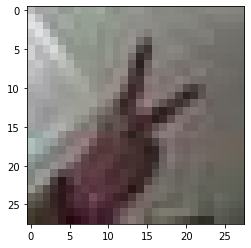

예측확률분포: [0.91025215 0.00612594 0.08362189]
라벨: 1, 예측결과: 0


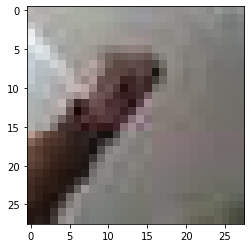

예측확률분포: [0.02491208 0.00315058 0.9719373 ]
라벨: 1, 예측결과: 2


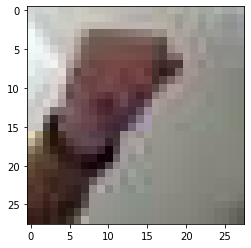

예측확률분포: [0.13330047 0.82582605 0.04087346]
라벨: 0, 예측결과: 1


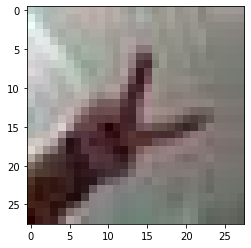

예측확률분포: [0.32002008 0.28452104 0.39545888]
라벨: 0, 예측결과: 2


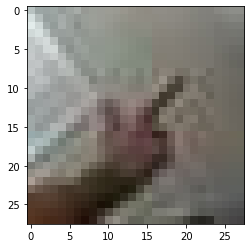

In [31]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 하이퍼파라미터 바꿔가면서 train, test 해보기 

In [33]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=512
n_channel_2=512
n_dense=1000
n_train_epoch=13

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) # 컬러그림이니 3으로 변경
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) # 가위, 바위, 보는 class가 3개이니 3으로 변경

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 512)       14336     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 512)       2359808   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              12801000  
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

# 총평

이번 exploration은 이미지 분류기를 만들고 학습시킨 후 test 데이터에서 60% 이상의 accuracy를 얻는 것이다.  
이미지분류기를 맨 처음 test 했을 때 accuracy가 0.4 정도가 나왔다.
그 후 변경 가능한 하이퍼파라미터를 수정해 돌려봤지만 accuracy 값은 오르지 않았고 오히려 떨어지는 경우도 있었다.
그래서 학습 자료가 부족한가 싶어서 자료를 추가해봤지만 마찬가지였다.  
약 60회?정도 돌려봤는데 이 내용이 맞는지는 모르겠지만 돌리면서 알게 된 것은
1. train, test 데이터의 질이 좋아햐 한다는 것과 
2. dense가 높으면 epoch가 낮아져야 한다는 것이다.
(대충 개념은 알겠는데 ch_1, ch_2, dense가 어떤 구조로 돌아가는 것인지는 모르겠다.)

앞에서 말했듯이 처음 test돌렸을 때 낮은 값을 얻었고 하이퍼파라미터를 계속 변경해서 돌려봤지만 똑같이 낮은 값을 얻었다.
그래서 고민하다 test 데이터를 좀 선명한? 데이터를 사용해보니 훨씬 좋은 수치가 나왔다. test 데이터를 바꾸자마자 높은 결과 값이 나오는 것을 보고 데이터의 질이 중요하다고 느꼈다. 물론, 0.77이 실제론 만족할만한 수치는 아니겠지만 계속 올라가지 않던 값이 올라가주니 속이 뚫리는 느낌이었다. 

또 한가지는, dense를 높히면 epoch를 낮춰야 한다는 것이다. 내가 찾아본 블로그에서는 epoch를 "트레이닝 셋이 신경망을 통과하는 횟수"라고 설명하는데 그냥 나는 epoch가 10이면 10번 학습시키는 것이라고 이해했다.  
아무튼, 0.6 이상의 accuracy를 얻기 위해 이미지 분류기를 학습시키면서 나는 단순하게 학습양이 많으면 좋은 결과를 얻겠지라고 생각하고 epoch를 10, 20, 30 ... 올리기 시작했다. 그래도 원하는 값을 얻지 못하자 dense를 500, 1,000, 수준으로 높혔다. 
dense를 높히니 조금씩 결과값이 좋아지기 시작했으나 dense가 올라가면 올라갈 수록 accuracy 값이 1로 나오는 순서가 빨라졌다. 
accuracy가 1이 많이 나오면 좋을 것이라 생각했는데 1이 많다고 accuracy가 오르진 않았다. 그래서 '1이 좋기만한 값은 아니구나' 생각하여 epoch를 낮췄고 여러번의 하이퍼파라미터 변경을 통해 0.6 이상의 결과 값을 얻을 수 있었다.

슬랙에 하이퍼파라미터 값은 2의 제곱?을 값에 넣어야 한다는 것 같은데 왜 그래야하는지, 무슨 뜻인지 잘 모르겠다.
조금 더 공부해야 할 것 같다.

처음 해본 실습?이다.  
솔직히 이렇게 하는 게 맞는건지..? 잘 모르겠다.
머신러닝, 딥러닝의 차이같이 이론적인 부분에 대해서는 설명으로 들으면 대충 알 것 같은면서도 뭐가 뭔지 잘 모르겠다.  
나는 개인적으론 이론적인 공부에서 배운다기 보다 실습을 하면서 배우는 것이 많다고 생각하기 때문에 앞으로도 다양한 실습이 나오면 좋겠다.
이렇게 exploration을 통해 많은 실습을 한다면 파이썬, 인공지능 등 여러가지에 대한 각종 개념과 방법 등 얻어질 것으로 기대하고 실습위주의 내용들이 많으면 좋겠다. 화이팅~~

ps. 퍼실님들 고생 많으십니다~!!!